In [1]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB # 다항분포 나이브 베이즈 모델
from sklearn.metrics import accuracy_score #정확도 계산
import tensorflow as tf
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import re
from tensorflow import keras
from tqdm import tqdm
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import ADASYN

In [2]:
import pandas as pd
data = pd.read_csv('C:/Users/trxgfcg/OneDrive/바탕 화면/big/spam.csv', encoding='latin1')

data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [3]:
del data['Unnamed: 2']
del data['Unnamed: 3']
del data['Unnamed: 4']
data['v1'] = data['v1'].replace(['ham','spam'],[0,1])
data[:5]

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
print('v2열의 유니크한 값 :',data['v2'].nunique())

v2열의 유니크한 값 : 5169


In [5]:
data.drop_duplicates(subset=['v2'], inplace=True)
print('총 샘플의 수 :',len(data))

총 샘플의 수 : 5169


In [6]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import pandas as pd

# NLTK 데이터 다운로드
nltk.download('punkt')
nltk.download('stopwords')

# 영어 불용어 목록
stop_words = set(stopwords.words('english'))

# 데이터 로드 (예시로 DataFrame을 사용합니다)
# 여기서는 DataFrame의 'text' 열에 텍스트 데이터가 있다고 가정합니다.
# 실제 데이터에 맞게 수정해야 합니다.
# 예시: df = pd.read_csv('your_dataset.csv')
# 데이터프레임의 'text' 열에 텍스트 데이터가 들어있다고 가정
# df['text']에 해당하는 컬럼명을 사용하세요.

# 예시 데이터


# 데이터프레임 생성 (실제 데이터에 맞게 수정해야 함)
df = pd.DataFrame(data, columns=['v2'])

# 불용어 제거 함수 정의
def remove_stopwords(text):
    tokens = word_tokenize(text)
    filtered_text = [word for word in tokens if word.lower() not in stop_words]
    return " ".join(filtered_text)

# 각 텍스트에 대해 불용어 제거 적용
df['v2'] = df['v2'].apply(remove_stopwords)

# 결과 출력
print(df)
data['v2'] = df

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\trxgfcg\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\trxgfcg\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                                     v2
0     Go jurong point , crazy .. Available bugis n g...
1                       Ok lar ... Joking wif u oni ...
2     Free entry 2 wkly comp win FA Cup final tkts 2...
3           U dun say early hor ... U c already say ...
4          Nah n't think goes usf , lives around though
...                                                 ...
5567  2nd time tried 2 contact u. U å£750 Pound priz...
5568                     Ì_ b going esplanade fr home ?
5569                  Pity , * mood . ... suggestions ?
5570  guy bitching acted like 'd interested buying s...
5571                                   Rofl . true name

[5169 rows x 1 columns]


In [7]:

#real = pd.read_csv('C:/Users/trxgfcg/OneDrive/바탕 화면/big/review_realtotal.csv')

In [8]:
#print('v2열의 유니크한 값 :',real['element_text'].nunique())

In [9]:
#real.drop_duplicates(subset=['element_text'], inplace=True)
#print('총 샘플의 수 :',len(real))

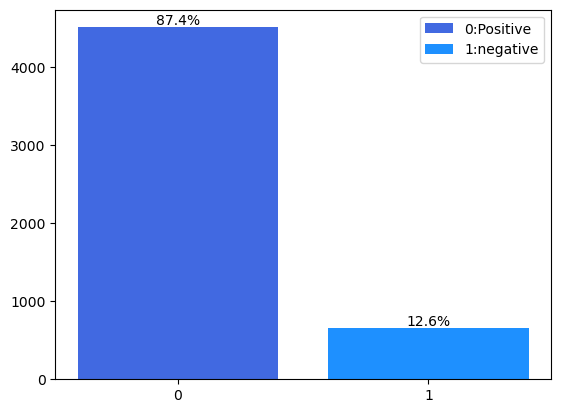

In [10]:
# 막대 그래프 그리기
total_count = data['v1'].count()
bars = plt.bar([0, 1], data['v1'].value_counts().values, color=['#4169E1', '#1E90FF'])

# x축 눈금과 레이블 설정
plt.xticks([0, 1], ['0', '1'])

# 범례 추가
plt.legend(bars, ['0: ham', '1: spam'])
for bar in bars:
    height = bar.get_height()
    percentage = height / total_count * 100
    plt.text(bar.get_x() + bar.get_width() / 2, height, '%.1f%%' % percentage, ha='center', va='bottom')

plt.savefig('C:/Users/trxgfcg/OneDrive/바탕 화면/학위논문_배경득/Spam_ratio.png')
# 그래프 표시
plt.show()


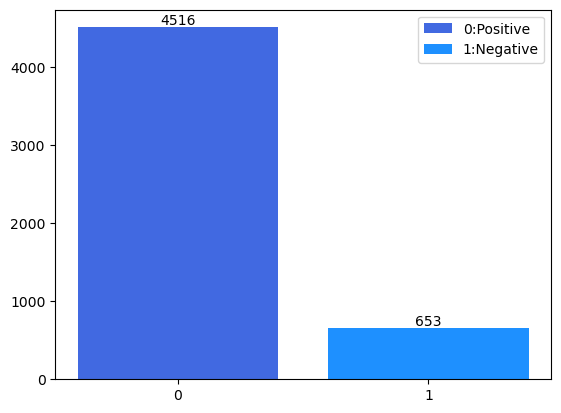

In [11]:
import matplotlib.pyplot as plt

# 데이터프레임에서 'v1' 칼럼의 값에 따른 갯수를 세기
v1_counts = data['v1'].value_counts()

# 전체 데이터 갯수
total_count = v1_counts.sum()

# 막대 그래프 그리기
bars = plt.bar([0, 1], v1_counts.values, color=['#4169E1', '#1E90FF'])

# x축 눈금과 레이블 설정
plt.xticks([0, 1], ['0', '1'])

# 범례 추가
plt.legend(bars, ['0:Positive', '1:Negative'])

# 각 막대 위에 데이터 갯수 표시
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, '%d' % height, ha='center', va='bottom')

# 그래프 표시
plt.show()


In [12]:
X_data = data['v2']
y_data = data['v1']
print('메일 본문의 개수: {}'.format(len(X_data)))
print('레이블의 개수: {}'.format(len(y_data)))


메일 본문의 개수: 5169
레이블의 개수: 5169


In [13]:
x_train, x_valid, y_train, y_valid= train_test_split(X_data, y_data, test_size=0.2, random_state=42)

In [14]:
x_train.fillna('', inplace=True)

In [15]:
dtmvector = CountVectorizer()
X_train_dtm = dtmvector.fit_transform(x_train)
print(X_train_dtm.shape)

(4135, 7590)


In [16]:
tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(X_train_dtm)
print(tfidfv.shape)

(4135, 7590)


In [17]:
mod = MultinomialNB()
orginal = mod.fit(tfidfv, y_train)

In [18]:
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

MultinomialNB()

In [19]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# 결측치를 빈 문자열로 대체
x_valid.fillna('', inplace=True)

# CountVectorizer로 변환
X_test_dtm = dtmvector.transform(x_valid)
tfidfv_test = tfidf_transformer.transform(X_test_dtm)

predicted = mod.predict(tfidfv_test)  # 테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_valid, predicted)) #예측값과 실제값 비교

정확도: 0.9661508704061895


In [20]:
from sklearn.metrics import f1_score

f1 = f1_score(y_valid, predicted)

print("F1-score:", f1)

F1-score: 0.8627450980392156


In [21]:
original_f1 = f1_score(y_valid, predicted)
print(f"F1-score={original_f1}")

F1-score=0.8627450980392156


In [22]:
df_test = pd.concat([x_valid, y_valid], axis=1)

In [23]:
df_train = pd.concat([x_train, y_train], axis=1)

In [24]:
def print_class_num(df, label_name):            # 이진 클래스의 비율을 알아보기 위한 함수
  n_total = len(df)                             # 데이터의 총 개수
  n_neg = len(df.query(label_name + ' == 1'))   # label로 사용하는 열의 1 개수
  n_pos = len(df.query(label_name + ' == 0'))   # label로 사용하는 열의 0 개수

  print("부정 댓글: {}개, {:.2f}%".format(n_neg, n_neg*100/n_total))
  print("긍정 댓글: {}개, {:.2f}%\n".format(n_pos, n_pos*100/n_total))

  values = df[label_name].value_counts()        # label로 사용하는 열의 값을 카운트
  values.plot(kind='bar')
  print(values)

In [25]:
df_test

,v2,v1
1617,u download fring app ?,0
2064,Pass dis ur contacts n see wat u get ! Red ; '...,0
1272,Ok ...,0
3020,film ill call later .,0
3642,"Sorry , left phone upstairs . OK , might hecti...",0
...,...,...
4146,Pls help tell sura 'm expecting battery hont ....,0
1208,Also maaaan missing,0
4795,URGENT 2nd attempt contact U . å£900 prize YES...,1
3575,sign maturity start saying big things .. actua...,0


부정 댓글: 145개, 14.02%
긍정 댓글: 889개, 85.98%

v1
0    889
1    145
Name: count, dtype: int64


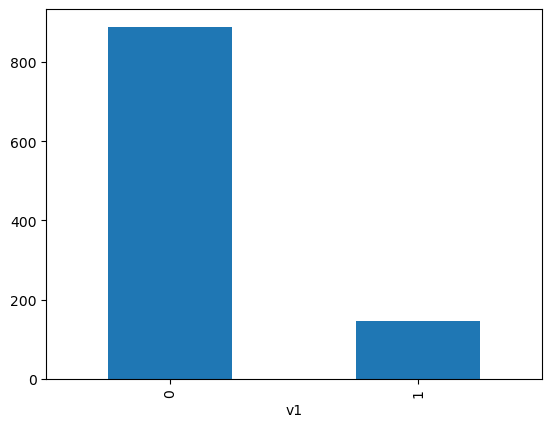

In [26]:
print_class_num(df_test, 'v1')

In [27]:
from imblearn.over_sampling import ADASYN
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

Amodels = []
f1_scores_A = [] 
# 테스트 데이터를 TF-IDF로 변환
X_test_dtm = dtmvector.transform(x_valid)
tfidfv_test = tfidf_transformer.transform(X_test_dtm)

# ADASYN을 사용하여 오버샘플링하고 정확도 측정
for i in range(3, 11):
    # ADASYN을 사용하여 오버샘플링
    adasyn = ADASYN(sampling_strategy=i/10)
    X_train_adasyn, y_train_adasyn = adasyn.fit_resample(tfidfv, y_train)

    # 모델 학습
    mod = MultinomialNB()
    mod.fit(X_train_adasyn, y_train_adasyn)
    
    #모델추가
    Amodels.append(mod)

    # 예측
    predicted = mod.predict(tfidfv_test)

    # F1-score 출력
    f1 = f1_score(y_valid, predicted)
    f1_scores_A.append(f1)
    print(f"sampling_strategy={i/10}: F1-score={f1}")


sampling_strategy=0.3: F1-score=0.9357142857142857
sampling_strategy=0.4: F1-score=0.9361702127659575
sampling_strategy=0.5: F1-score=0.9278350515463917
sampling_strategy=0.6: F1-score=0.918918918918919
sampling_strategy=0.7: F1-score=0.906040268456376
sampling_strategy=0.8: F1-score=0.8954248366013072
sampling_strategy=0.9: F1-score=0.8896103896103897
sampling_strategy=1.0: F1-score=0.8896103896103897


In [28]:
from imblearn.over_sampling import ADASYN
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

f1_scores_S = [] 
# 테스트 데이터를 TF-IDF로 변환
X_test_dtm = dtmvector.transform(x_valid)
tfidfv_test = tfidf_transformer.transform(X_test_dtm)

Smodels = []

# ADASYN을 사용하여 오버샘플링하고 정확도 측정
for i in range(3, 11):
    # ADASYN을 사용하여 오버샘플링
    smote = SMOTE(sampling_strategy=i/10)
    X_train_smote, y_train_smote = smote.fit_resample(tfidfv, y_train)

    # 모델 학습
    mod = MultinomialNB()
    mod.fit(X_train_smote, y_train_smote)
    # 생성된 모델을 리스트에 추가
    Smodels.append(mod)

    # 예측
    predicted = mod.predict(tfidfv_test)


   # F1-score 출력
    f1 = f1_score(y_valid, predicted)
    f1_scores_S.append(f1)
    print(f"sampling_strategy={i/10}: F1-score={f1}")


sampling_strategy=0.3: F1-score=0.9236363636363637
sampling_strategy=0.4: F1-score=0.9257950530035336
sampling_strategy=0.5: F1-score=0.9183673469387755
sampling_strategy=0.6: F1-score=0.9121621621621622
sampling_strategy=0.7: F1-score=0.9121621621621622
sampling_strategy=0.8: F1-score=0.9072847682119206
sampling_strategy=0.9: F1-score=0.9013157894736843
sampling_strategy=1.0: F1-score=0.8867313915857605


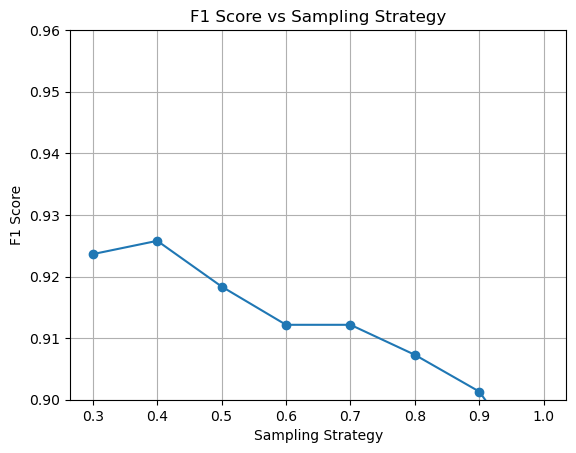

In [29]:
import matplotlib.pyplot as plt

sampling_strategies = [i/10 for i in range(3, 11)]

plt.plot(sampling_strategies, f1_scores_S, marker='o')
plt.title('F1 Score vs Sampling Strategy')
plt.xlabel('Sampling Strategy')
plt.ylabel('F1 Score')
plt.grid(True)

plt.ylim(0.9, 0.96)
plt.axhline(y=original_f1, color='r', linestyle='--')

plt.show()


In [30]:
from imblearn.over_sampling import ADASYN
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
f1_scores_B = [] 
Bmodels = [] 

# 테스트 데이터를 TF-IDF로 변환
X_test_dtm = dtmvector.transform(x_valid)
tfidfv_test = tfidf_transformer.transform(X_test_dtm)

# ADASYN을 사용하여 오버샘플링하고 정확도 측정
for i in range(3, 11):
    # ADASYN을 사용하여 오버샘플링
    Bsmote = BorderlineSMOTE(sampling_strategy=i/10)
    X_train_B, y_train_B = Bsmote.fit_resample(tfidfv, y_train)

    # 모델 학습
    mod = MultinomialNB()
    mod.fit(X_train_B, y_train_B)
    # 생성된 모델을 리스트에 추가
    Bmodels.append(mod)

    # 예측
    predicted = mod.predict(tfidfv_test)

    # F1-score 출력
    f1 = f1_score(y_valid, predicted)
    f1_scores_B.append(f1)
    print(f"sampling_strategy={i/10}: F1-score={f1}")


sampling_strategy=0.3: F1-score=0.9280575539568345
sampling_strategy=0.4: F1-score=0.9361702127659575
sampling_strategy=0.5: F1-score=0.9209621993127147
sampling_strategy=0.6: F1-score=0.9215017064846416
sampling_strategy=0.7: F1-score=0.9152542372881356
sampling_strategy=0.8: F1-score=0.9036544850498339
sampling_strategy=0.9: F1-score=0.9042904290429041
sampling_strategy=1.0: F1-score=0.8925081433224755


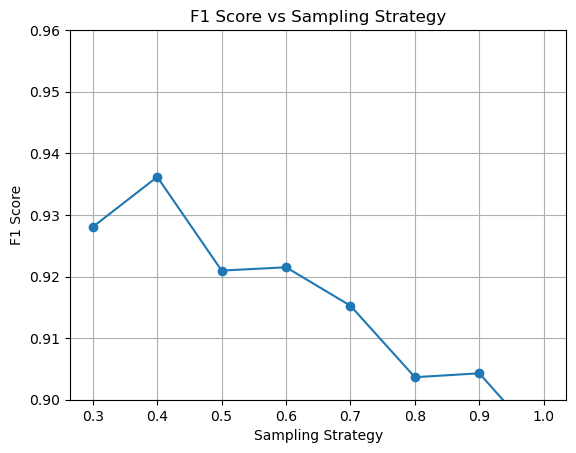

In [31]:
import matplotlib.pyplot as plt

sampling_strategies = [i/10 for i in range(3, 11)]

plt.plot(sampling_strategies, f1_scores_B, marker='o')
plt.title('F1 Score vs Sampling Strategy')
plt.xlabel('Sampling Strategy')
plt.ylabel('F1 Score')
plt.grid(True)

plt.ylim(0.9, 0.96)
plt.axhline(y=original_f1, color='r', linestyle='--')

plt.show()


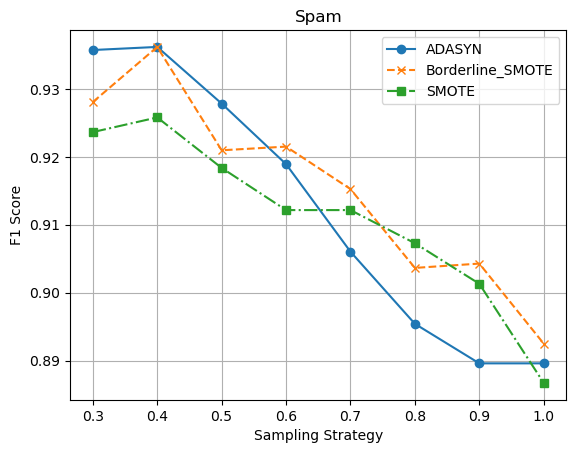

In [32]:
import matplotlib.pyplot as plt

sampling_strategies = [i/10 for i in range(3, 11)]
plt.plot(sampling_strategies, f1_scores_A, marker='o', linestyle='-', label='ADASYN')
plt.plot(sampling_strategies, f1_scores_B, marker='x', linestyle='--', label='Borderline_SMOTE')
plt.plot(sampling_strategies, f1_scores_S, marker='s', linestyle='-.', label='SMOTE')

plt.title('Spam')
plt.xlabel('Sampling Strategy')
plt.ylabel('F1 Score')
plt.grid(True)

plt.legend()  # 범례 추가

plt.savefig('C:/Users/trxgfcg/OneDrive/바탕 화면/학위논문_배경득/Spamdata_result_no2.png')
plt.show()


In [33]:
original_f1

0.8627450980392156